# EDA and Insights

## Imports

In [89]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
# Graphs
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns

## Read data

In [2]:
df = pd.read_csv('../raw_data/shortlist.zip', index_col='date_received', parse_dates=True)

## Complaints per period - first cycle of analysis

In [5]:
df.columns

Index(['product', 'subproduct', 'issue', 'company_name',
       'company_response_to_consumer', 'timely_response', 'complaint_id'],
      dtype='object')

<AxesSubplot:xlabel='date_received'>

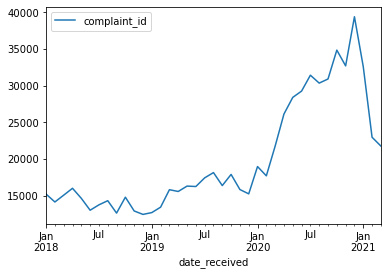

In [7]:
df[['complaint_id']].resample('M').count().plot()

**complaints skyrocked with the coronavirus outbreak**

In [59]:
# Looking that trend by companies
compl_p_month = df[['complaint_id', 'company_name']].groupby(['company_name']) \
.resample('M').count()['complaint_id'].reset_index()

# Plot: Complaints per month
fig = px.line(compl_p_month, x='date_received', y='complaint_id', color='company_name',
              title='Monthly Complaints', labels={'company_name': 'Companies',
                                                  'date_received': 'Date',
                                                  'complaint_id': 'Complaints'
                                                  }, width=800, height=600, template='simple_white')

fig.update_layout(legend=dict(title=None, orientation="h", y=1, yanchor="bottom", x=0.7, xanchor="center"))

**Three companies are responsible for the trend**. 1. The monthly complaints seems stable among companies, despite the three first.

### What is the average monthly complaints per company? are they statistically different? 

In [91]:
# Some descriptive statistics
des_p_month = compl_p_month.groupby(['company_name']).describe().sort_values(by=[('complaint_id', 'mean')],
                                                                             ascending=False)
des_p_month

complaint_id                            \
                                              count         mean          std   
company_name                                                                    
TRANSUNION INTERMEDIATE HOLDINGS, INC.         39.0  4564.384615  2648.616726   
EQUIFAX, INC.                                  39.0  4379.974359  2115.199424   
Experian Information Solutions Inc.            39.0  4196.333333  2547.136931   
JPMORGAN CHASE & CO.                           39.0   729.769231    97.631817   
BANK OF AMERICA, NATIONAL ASSOCIATION          39.0   715.923077   150.135795   
CAPITAL ONE FINANCIAL CORPORATION              39.0   707.743590   113.992548   
WELLS FARGO & COMPANY                          39.0   651.846154   103.905964   
CITIBANK, N.A.                                 39.0   643.307692    92.390520   
SYNCHRONY FINANCIAL                            39.0   392.897436    49.925099   
Navient Solutions, LLC.                        39.0   294.820513   120.758975   
U.S. BANCORP                                   39.0   258.282051    93.479789   
AMERICAN EXPRESS COMPANY                       39.0   244.435897    41.112679   
PORTFOLIO RECOVERY ASSOCIATES INC              39.0   237.179487    57.283630   
Alliance Data Card Services                    39.0   236.564103    37.628933   
PNC Bank N.A.                                  39.0   193.794872   216.641734   
DISCOVER BANK                                  39.0   189.205128    31.254624   
TD BANK US HOLDING COMPANY                     39.0   182.487179    43.765446   
AES/PHEAA                                      39.0   163.641026    42.316158   
Paypal Holdings, Inc                           39.0   158.128205    87.414674   
ENCORE CAPITAL GROUP INC.                      39.0   154.512821    27.775294   
Santander Consumer USA Holdings Inc.           39.0   129.538462    41.859946   
BARCLAYS BANK DELAWARE                         39.0   122.461538    21.474399   
ALLY FINANCIAL INC.                            39.0   111.666667    33.064796   
NAVY FEDERAL CREDIT UNION                      39.0   110.538462    27.957530   
CITIZENS FINANCIAL GROUP, INC.                 39.0    82.230769    16.955765   
Coinbase, Inc.                                 39.0    65.615385   148.981916   
Chime Financial Inc                            12.0    56.416667    50.609842   
Colony Brands, Inc.                            39.0    16.948718     5.311104   
Ameritech Financial                            29.0     7.448276    17.062043   
Premier Student Loan Center                    37.0     5.000000     4.818944   
Mobiloans, LLC                                 38.0     4.052632     1.888047   

                                                                          \
                                           min      25%     50%      75%   
company_name                                                               
TRANSUNION INTERMEDIATE HOLDINGS, INC.  2126.0  2449.00  3409.0  6714.50   
EQUIFAX, INC.                           2311.0  2578.50  3570.0  6158.50   
Experian Information Solutions Inc.     1780.0  2557.00  3164.0  4465.50   
JPMORGAN CHASE & CO.                     464.0   674.50   745.0   782.50   
BANK OF AMERICA, NATIONAL ASSOCIATION    414.0   653.00   700.0   779.50   
CAPITAL ONE FINANCIAL CORPORATION        555.0   603.50   694.0   777.00   
WELLS FARGO & COMPANY                    424.0   601.00   654.0   696.50   
CITIBANK, N.A.                           456.0   585.50   611.0   707.00   
SYNCHRONY FINANCIAL                      240.0   360.50   401.0   425.50   
Navient Solutions, LLC.                  110.0   189.00   288.0   404.00   
U.S. BANCORP                             150.0   196.00   220.0   275.00   
AMERICAN EXPRESS COMPANY                 163.0   227.00   234.0   253.00   
PORTFOLIO RECOVERY ASSOCIATES INC        152.0   195.50   220.0   273.00   
Alliance Data Card Services              176.0   212.50   225.0   25

In [98]:
# defining loosely statistical groups
company_list = des_p_month.index.unique()

groups = {}
g_num = 1
for i in range(0, des_p_month.index.nunique()-1):
    p_value = mannwhitneyu(x = compl_p_month.loc[compl_p_month.company_name == company_list[i], 
                                                 'complaint_id'].to_list(), 
                           y = compl_p_month.loc[compl_p_month.company_name == company_list[i+1], 
                                                 'complaint_id'].to_list())[1]
    if p_value < 0.05:
        groups[company_list[i]] = g_num
        g_num += 1
        groups[company_list[i+1]] = g_num
    else:
        groups[company_list[i]] = g_num
        groups[company_list[i+1]] = g_num
    
groups

{'TRANSUNION INTERMEDIATE HOLDINGS, INC.': 1,
 'EQUIFAX, INC.': 1,
 'Experian Information Solutions Inc.': 1,
 'JPMORGAN CHASE & CO.': 2,
 'BANK OF AMERICA, NATIONAL ASSOCIATION': 2,
 'CAPITAL ONE FINANCIAL CORPORATION': 2,
 'WELLS FARGO & COMPANY': 3,
 'CITIBANK, N.A.': 3,
 'SYNCHRONY FINANCIAL': 4,
 'Navient Solutions, LLC.': 5,
 'U.S. BANCORP': 5,
 'AMERICAN EXPRESS COMPANY': 5,
 'PORTFOLIO RECOVERY ASSOCIATES INC': 5,
 'Alliance Data Card Services': 5,
 'PNC Bank N.A.': 6,
 'DISCOVER BANK': 7,
 'TD BANK US HOLDING COMPANY': 7,
 'AES/PHEAA': 7,
 'Paypal Holdings, Inc': 7,
 'ENCORE CAPITAL GROUP INC.': 7,
 'Santander Consumer USA Holdings Inc.': 8,
 'BARCLAYS BANK DELAWARE': 8,
 'ALLY FINANCIAL INC.': 9,
 'NAVY FEDERAL CREDIT UNION': 9,
 'CITIZENS FINANCIAL GROUP, INC.': 10,
 'Coinbase, Inc.': 11,
 'Chime Financial Inc': 11,
 'Colony Brands, Inc.': 11,
 'Ameritech Financial': 12,
 'Premier\xa0Student\xa0Loan\xa0Center': 12,
 'Mobiloans, LLC': 12}

Appliying a non-parametric test we loosely slit the companies into 12 groups, each groups is statistically similar within it.

In [100]:
df['group'] = [groups[key] for key in df.company_name]

In [326]:
# 5 first groups

df_bplot = df[df.group <= 6].groupby(['group','company_name']) \
.resample('M').count()['complaint_id'].reset_index()

# Streamlit
df_bplot.to_json('../tidy_data/df_bpolt.json')

fig = px.box(df_bplot, x='company_name', y='complaint_id', color='group',
             title='Boxplot - Monthly Complaints per Companies', labels={'company_name': 'Companies',
                                                                         'complaint_id': 'Monthly complaints',
                                                                         'group': 'Groups'},
             category_orders={'group': [1, 2, 3, 4, 5, 6]},
             width=800, height=600, template='simple_white')

fig.update_layout(legend=dict(title=None, orientation="h", y=1, yanchor="bottom", x=0.5, xanchor="center"))

### Do companies respond on time? (subset group <= 6)

In [327]:
df_sub7 = df.loc[(df.group <= 6) & (df.timely_response == False)]
df_sub7_bplot = df_sub7.groupby(['group', 'company_name']).resample('M') \
.count()['complaint_id'].reset_index().groupby(['group', 'company_name']).mean() \
.reset_index().sort_values(by=['complaint_id'], ascending=False)

df_sub7_bplot['group'] = df_sub7_bplot['group'].astype(str)

# Streamlit
df_sub7_bplot.to_json('../tidy_data/df_sub7_bplot.json')

fig = px.bar(df_sub7_bplot, x='company_name', y='complaint_id', color='group',
             category_orders ={'company_name': df_sub7_bplot.company_name},
             width=800, height=600, template='simple_white')
fig.show()

### Which companies has the most 'In progress' responses

In [328]:
df_in_prog = df.loc[(df.group <= 6) & (df.company_response_to_consumer == 'In progress')]
df_in_prog = df_in_prog.groupby(['group', 'company_name']).count()['complaint_id'] \
.reset_index().sort_values(by=['complaint_id'], ascending=False)

# Streamlit
df_in_prog.to_json('../tidy_data/df_in_prog.json')

df_in_prog['group'] = df_in_prog['group'].astype(str)

fig = px.bar(df_in_prog, x='company_name', y='complaint_id', color='group',
             category_orders ={'company_name': df_in_prog.company_name},
             width=800, height=600, template='simple_white')
fig.show()

In [301]:
df_resp = df.loc[(df.company_name.isin(['Alliance Data Card Services', 'SYNCHRONY FINANCIAL'])) & 
                 (df.index > '2021-01-01')]
df_resp = df_resp.groupby(['company_name', 'company_response_to_consumer']).count()['complaint_id'] \
.reset_index().sort_values(by=['complaint_id'], ascending=False)


fig = px.bar(df_resp, x='company_name', y='complaint_id', color='company_response_to_consumer',
             category_orders ={'company_name': df_in_prog.company_name},
             width=800, height=600, template='simple_white')
fig.show()

There is no link between monthly complaints and timely response. In addition, only five companies postpone two or more responses per month. However, when we look to complaints with "In progress" status one company with few monthly complaints presents almost the same amount in progress - Alliance Data Card Services. Backlog is an interest feature to observe because companies that don't present a high monthly complaints might not have people to deal with the backlog.

### Which companies have the biggest ratio between In progress and mnthly median

In [330]:
df_median_prog = df_in_prog.merge(df_bplot.groupby(['group', 
                                                    'company_name']).median(), 
                                  how='left', on=['company_name'])

df_median_prog.rename(columns={'complaint_id_x': 'In progress', 'complaint_id_y': 'Median',
                      'company_name': 'Company Name', 'group': 'Group'}, inplace=True)
df_median_prog['Complaint ratio'] = df_median_prog['In progress'] / df_median_prog['Median']
df_median_prog.sort_values(by=['Complaint ratio'], ascending=False, inplace=True)
df_median_prog.set_index('Group')

,Company Name,In progress,Median,Complaint ratio
Group,,,,
2,"BANK OF AMERICA, NATIONAL ASSOCIATION",1452,700,2.074286
1,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",6507,3409,1.908771
5,Alliance Data Card Services,280,225,1.244444
6,PNC Bank N.A.,104,126,0.825397
4,SYNCHRONY FINANCIAL,159,401,0.396509
2,CAPITAL ONE FINANCIAL CORPORATION,184,694,0.265130
2,JPMORGAN CHASE & CO.,151,745,0.202685
1,Experian Information Solutions Inc.,527,3164,0.166561
3,WELLS FARGO & COMPANY,87,654,0.133028


### Which products has the most complaints 

In [331]:
df_prods = df.loc[(df.group <= 6)].groupby(['product', 
                                              'company_name']).count()['complaint_id'] \
             .reset_index().sort_values(by=['complaint_id'], ascending=False)

# Streamlit
df_prods.to_json('../tidy_data/df_prods.json')                                        

fig = px.bar(df_prods, x='product', y='complaint_id', color='company_name',
             width=800, height=600, template='simple_white')
fig.show()

Of course, we have a winner among the products, with the first product also being responsible for the majority of group 1 complaints. Among other companies apart the first product that is also lider, the complaints are less "specialized"

In [342]:
list(set(df[df.group <= 1]['company_name']) | 
     set(df_median_prog.loc[df_median_prog['Complaint ratio'] > 0.3]['Company Name']) |
     set(df_sub7_bplot.loc[df_sub7_bplot.complaint_id > 2]['company_name']))     

['EQUIFAX, INC.',
 'Experian Information Solutions Inc.',
 'Alliance Data Card Services',
 'WELLS FARGO & COMPANY',
 'TRANSUNION INTERMEDIATE HOLDINGS, INC.',
 'BANK OF AMERICA, NATIONAL ASSOCIATION',
 'SYNCHRONY FINANCIAL',
 'PNC Bank N.A.']